In [3]:
import pandas as pd

In [2]:
df = pd.read_csv('./static/data/dist_info.csv')
df.head()

,구별,인구수,한국인,외국인,고령자,공원수,면적,1인당공원면적,공원면적합,공원면적비
0,종로구,159842,149952,9890,28396,12,23.91,24.447145,3.907681,16.343290
1,중구,135321,125800,9521,24265,5,9.96,21.824324,2.953289,29.651500
2,용산구,244953,229786,15167,39995,2,21.87,1.009149,0.247194,1.130289
3,성동구,302695,295591,7104,45372,5,16.86,2.070859,0.626839,3.717905
4,광진구,361923,348064,13859,50047,2,17.06,1.613608,0.584002,3.423224


In [3]:
import requests
from urllib.parse import urlparse, quote

In [4]:
key_fd = open('roadapikey.txt', mode='r')
roadapi_key = key_fd.read(100)
key_fd.close()

In [5]:
road_addrs = []
dists = list(df['구별'])
for i in range(len(dists)):
    dists[i] += '청'
for dist in dists:
    road_url = 'https://www.juso.go.kr/addrlink/addrLinkApi.do'
    url = f'{road_url}?confmKey={roadapi_key}&currentPage=1&coutPerPage=10&keyword={quote(dist)}&resultType=json'
    result = requests.get(url).json()
    road_addr = result['results']['juso'][0]['roadAddr']
    road_addrs.append(road_addr)
road_addrs

['서울특별시 종로구 삼봉로 43 (수송동)',
 '부산광역시 중구 중구로 120 (대청동1가)',
 '서울특별시 용산구 백범로79길 64 (청파동3가)',
 '서울특별시 성동구 고산자로 270 (행당동)',
 '서울특별시 광진구 자양로 117 (자양동)',
 '서울특별시 동대문구 천호대로 145 (용두동)',
 '서울특별시 중랑구 봉화산로 179 (신내동)',
 '서울특별시 성북구 보문로 168 (삼선동5가)',
 '서울특별시 강북구 도봉로89길 13 (수유동)',
 '서울특별시 도봉구 마들로 656 (방학동)',
 '서울특별시 노원구 노해로 437 (상계동)',
 '서울특별시 은평구 은평로 195 (녹번동)',
 '서울특별시 서대문구 연희로 247 (연희동)',
 '서울특별시 마포구 월드컵로 212 (성산동)',
 '서울특별시 양천구 목동동로 105 (신정동)',
 '서울특별시 강서구 남부순환로 208 (외발산동)',
 '서울특별시 구로구 가마산로 245 (구로동)',
 '서울특별시 금천구 시흥대로73길 70 (시흥동)',
 '서울특별시 영등포구 당산로 123 (당산동3가)',
 '서울특별시 동작구 장승배기로 161 (노량진동)',
 '서울특별시 관악구 관악로 145 (봉천동)',
 '서울특별시 서초구 남부순환로 2584 (서초동)',
 '서울특별시 강남구 도곡로18길 7 (도곡동)',
 '서울특별시 송파구 올림픽로 326 (신천동)',
 '서울특별시 강동구 동남로 942 (고덕동)']

In [6]:
key_fd = open('kakaokey.txt', mode='r')
kakao_key = key_fd.read(100)
key_fd.close()

In [7]:
lat_list, lng_list = [], []
for addr in road_addrs:
    url = 'https://dapi.kakao.com/v2/local/search/address.json?query=' + quote(addr)
    result = requests.get(url, headers={"Authorization": 'KakaoAK '+kakao_key}).json()
    lng = float(result['documents'][0]['x'])
    lat = float(result['documents'][0]['y'])
    lat_list.append(lat); lng_list.append(lng)

In [8]:
df['위도'] = lat_list
df['경도'] = lng_list
df.head()

,구별,인구수,한국인,외국인,고령자,공원수,면적,1인당공원면적,공원면적합,공원면적비,위도,경도
0,종로구,159842,149952,9890,28396,12,23.91,24.447145,3.907681,16.343290,37.573199,126.978813
1,중구,135321,125800,9521,24265,5,9.96,21.824324,2.953289,29.651500,35.106197,129.032351
2,용산구,244953,229786,15167,39995,2,21.87,1.009149,0.247194,1.130289,37.541602,126.964977
3,성동구,302695,295591,7104,45372,5,16.86,2.070859,0.626839,3.717905,37.563423,127.036965
4,광진구,361923,348064,13859,50047,2,17.06,1.613608,0.584002,3.423224,37.538540,127.081912


In [9]:
df.to_csv('./static/data/dist_info.csv')

In [17]:
park_new = pd.read_csv('./static/data/park_info.csv')
df2 = park_new[park_new['구별'] == '양천구'].reset_index()
df2

,index,Unnamed: 0,공원번호,공원명,면적,구별,주소,경도,위도,공원개요,공원크기
0,30,30,47,계남근린공원,603715.2,양천구,서울특별시 양천구 신정동 산44-2일대,126.847964,37.513836,휴식공간 양천구 신정동과 구로구 고척동 일대의 옛지명인 부평군 계남면의 지명을 따서...,소
1,52,52,127,서서울호수공원,217946.0,양천구,서울특별시 양천구 남부순환로64길 20 (신월동),126.830479,37.527839,2009년 10월 개장한 서서울호수공원은 양천구 신월동에 위치한 옛 신월정수장을 공...,소
2,53,53,104,용왕산근린공원,213552.0,양천구,서울특별시 양천구 목동 199-51,126.878313,37.542959,옛 지도상에는 엄지산(嚴知山)으로 기록되어 있으며 엄지의 뜻은 순수한 우리말인 첫머...,소
3,67,67,61,갈산근린공원,138596.0,양천구,서울특별시 양천구 신정동 162-56,126.868915,37.508212,용왕산의 동쪽 능선 끝이 안양천에 닿아 있는데 이 안양천을 따라 남쪽으로 내려가서 ...,소
4,101,101,51,파리근린공원,29619.3,양천구,서울특별시 양천구 목동동로 363,126.876393,37.534974,프랑스와 수교 100주년이 되는 1986년에 기념 사업의 하나로 파리에 서울광장을 ...,소


In [18]:
df2['공원명'][4]

'파리근린공원'

In [19]:
for i in df2.index:
    if df2['공원크기'][i] == '대':
        print('대')
    elif df2['공원크기'][i] == '중':
        print('중')
    else:
        print('소')

소
소
소
소
소


In [6]:
coffee = pd.read_csv('./static/data/cafe_count.csv')
coffee = coffee.set_index('Unnamed: 0')
coffee

,스타벅스,커피빈,빽다방,이디야,커피지수
Unnamed: 0,,,,,
강원 강릉시,5,0,2,14,0.312500
강원 고성군,2,0,0,1,2.000000
강원 동해시,1,1,1,1,1.000000
강원 삼척시,1,0,2,1,0.333333
강원 속초시,4,0,0,8,0.500000
...,...,...,...,...,...
충북 청주시 상당구,5,1,2,7,0.666667
충북 청주시 서원구,4,0,3,6,0.444444
충북 청주시 청원구,3,0,1,8,0.333333


In [11]:
 star_rank = coffee['스타벅스'].sort_values(ascending=False).head(10)
 star_rank.name

'스타벅스'

In [13]:
pop_cri = pd.read_csv('./static/data/pop_cri.csv')
del pop_cri['Unnamed: 0']
pop_cri

,광역시도,시군구,행정구,20~39세,20~39세 여자,65세이상,인구,남성 인구,여성 인구,소멸비율,소멸위기지역,ID,y,x
0,강원,강릉시,NaN,46008,20993,40497,203057,101154,101903,1.036768,False,강릉,3,11
1,강원,고성군,NaN,4006,1699,7005,23621,11933,11688,0.485082,True,고성(강원),0,10
2,강원,동해시,NaN,16311,7510,16152,83888,42093,41795,0.929916,True,동해,4,11
3,강원,삼척시,NaN,12428,5280,14953,61833,31630,30203,0.706213,True,삼척,5,11
4,강원,속초시,NaN,15928,7411,14010,76302,37488,38814,1.057959,False,속초,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,충북,청주시,상당구,39870,19444,25585,167873,82711,85162,1.519953,False,청주 상당,14,6
246,충북,청주시,서원구,53447,25609,26464,197002,97386,99616,1.935384,False,청주 서원,14,7
247,충북,청주시,청원구,57755,26880,21908,188723,95997,92726,2.453898,False,청주 청원,13,7
248,충북,청주시,흥덕구,75036,36141,26340,248926,124808,124118,2.744191,False,청주 흥덕,12,7


In [6]:
import pandas as pd

import DB.covid_db as cov

ModuleNotFoundError: No module named 'db_module'

In [8]:
cov.get_covid_status('20201101', '20201130')
covid_status = pd.read_csv('./static/data/covid_status.csv')
covid_status

,일시,지역,누적확진,국내발생,해외유입,전일대비 증감,10만명당 발생률,사망,격리해제,격리중
0,2020-11-30,검역,21301,0,10,10,-,0,1618,512
1,2020-11-30,검역,2130,0,10,10,-,0,1618,512
2,2020-11-30,제주,80,0,1,1,11.93,0,60,20
3,2020-11-30,경남,625,19,1,20,18.59,1,388,236
4,2020-11-30,경북,1704,4,0,4,64.00,57,1560,87
...,...,...,...,...,...,...,...,...,...,...
586,2020-11-01,인천,1049,0,4,4,35.49,11,986,52
587,2020-11-01,대구,7176,2,0,2,294.52,196,6943,37
588,2020-11-01,부산,592,0,0,0,17.35,9,516,67
589,2020-11-01,서울,6056,45,0,45,62.22,78,5496,482


In [9]:
covid_status.tail(40)

,일시,지역,누적확진,국내발생,해외유입,전일대비 증감,10만명당 발생률,사망,격리해제,격리중
551,2020-11-03,서울,6103,21,1,22,62.70,78,5545,480
552,2020-11-03,합계,26807,46,29,75,51.70,472,24510,1825
553,2020-11-02,검역,1787,0,7,7,-,0,1470,317
554,2020-11-02,제주,59,0,0,0,8.80,0,59,0
555,2020-11-02,경남,319,0,1,1,9.49,0,299,20
556,2020-11-02,경북,1588,0,1,1,59.64,57,1517,14
557,2020-11-02,전남,190,2,0,2,10.19,2,174,14
558,2020-11-02,전북,166,0,0,0,9.13,0,149,17
559,2020-11-02,충남,561,11,0,11,26.43,8,490,63
560,2020-11-02,충북,192,1,1,2,12.00,2,175,15


In [1]:
import pandas as pd
from DB import db_module, covid_db as cov

In [3]:
cov.get_covid_status('20201101', '20201130')
covid_status = pd.read_csv('./static/data/covid_status.csv')

OperationalError: near "일시": syntax error

### rest api에서 데이터 가져오기(시도별)

In [1]:
import requests
import pandas as pd
from datetime import datetime
from bs4 import BeautifulSoup

In [2]:
key_fd = open('gov_data_api_key.txt', mode='r')
govapi_key = key_fd.read(100)
key_fd.close()

In [3]:
start_date = '20201222'; end_date = '20201222'
base_url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson'
url = f'{base_url}?ServiceKey={govapi_key}&pageNo=1&numOfRows=10&startCreateDt={start_date}&endCreateDt={end_date}'
result = requests.get(url)
soup = BeautifulSoup(result.text, 'xml')

In [4]:
items = soup.find_all('item')
regions, qur_rates, std_days, death_cnts, inc_decs, isol_clr_cnts, isol_ing_cnts, def_cnts, local_occ_cnts, over_flow_cnts = [], [], [], [], [], [], [], [], [], []
for item in items:
    death_cnt = item.find('deathCnt').string if item.find('deathCnt') else 0
    def_cnt = item.find('defCnt').string if item.find('defCnt') else 0
    region = item.find('gubun').string if item.find('gubun') else ''
    inc_dec = item.find('incDec').string if item.find('incDec') else 0
    isol_clr_cnt = item.find('isolClearCnt').string if item.find('isolClearCnt') else 0
    isol_ing_cnt = item.find('isolIngCnt').string if item.find('isolIngCnt') else 0
    local_occ_cnt = item.find('localOccCnt').string if item.find('localOccCnt') else 0
    over_flow_cnt = item.find('overFlowCnt').string if item.find('overFlowCnt') else 0
    qur_rate = item.find('qurRate').string if item.find('qurRate') else ''
    if qur_rate == None:
        qur_rate = '-'
    elif qur_rate[-1] == '.':
        qur_rate = qur_rate[:-1]
    std_day = ''.join(item.find('stdDay').string.split()[:-1]).replace('년', '-').replace('월', '-').replace('일', '')
    std_day = datetime.strptime(std_day, '%Y-%m-%d')
    std_day = std_day.strftime('%Y-%m-%d')
    regions.append(region); qur_rates.append(qur_rate); std_days.append(std_day); death_cnts.append(death_cnt) 
    inc_decs.append(inc_dec); isol_clr_cnts.append(isol_clr_cnt); def_cnts.append(def_cnt)
    local_occ_cnts.append(local_occ_cnt); isol_ing_cnts.append(isol_ing_cnt); over_flow_cnts.append(over_flow_cnt)

In [5]:
covid_status = pd.DataFrame({
    '일시': std_days,
    '지역': regions,
    '누적확진': def_cnts,
    '국내발생': local_occ_cnts,
    '해외유입': over_flow_cnts,
    '전일대비 증감': inc_decs,
    '10만명당 발생률': qur_rates,
    '사망': death_cnts,
    '격리해제': isol_clr_cnts,
    '격리중': isol_ing_cnts
})

covid_status = covid_status.set_index('지역')
covid_status = covid_status.drop(['검역'])
covid_status = covid_status.reset_index()
covid_status = covid_status.set_index('일시')
covid_status = covid_status.reset_index()

In [9]:
covid_status

,일시,지역,누적확진,국내발생,해외유입,전일대비 증감,10만명당 발생률,사망,격리해제,격리중
0,2020-12-21,제주,252,23,0,23,18.93,0,102,150
1,2020-12-21,경남,1077,15,0,15,26.36,3,748,326
2,2020-12-21,경북,2035,48,0,48,70.05,61,1715,259
3,2020-12-21,전남,508,8,1,9,25.79,5,418,85
4,2020-12-21,전북,688,11,2,13,28.67,7,441,240
...,...,...,...,...,...,...,...,...,...,...
5450,2020-03-01,인천,0,0,0,0,-,0,0,0
5451,2020-03-01,대구,0,0,0,469,-,9,0,0
5452,2020-03-01,부산,0,0,0,3,-,0,0,0
5453,2020-03-01,서울,0,0,0,10,-,0,0,0


### insert into covid_status

In [1]:
import sqlite3

In [2]:
from DB import db_module as dm

In [3]:
dm.create_table()

In [8]:
sql_insert = f'insert into covid_status values(?, ?, ?, ?, ?, ?, ?, ?, ?, ?);'
for i in covid_status.index:
        params = [covid_status['일시'][i], covid_status['지역'][i], int(covid_status['누적확진'][i]), int(covid_status['국내발생'][i]), int(covid_status['해외유입'][i]), int(covid_status['전일대비 증감'][i]), int(covid_status['사망'][i]), int(covid_status['격리해제'][i]), int(covid_status['격리중'][i])]
        params.append(None if covid_status['10만명당 발생률'][i] == '-' else float(covid_status['10만명당 발생률'][i]))
        conn = sqlite3.connect('./DB/covid_1.db')
        cur = conn.cursor()
        cur.execute(sql_insert, params)
        conn.commit()
        conn.close()

### 성별, 연령별

In [9]:
import requests
import pandas as pd
from datetime import datetime
from bs4 import BeautifulSoup

In [10]:
key_fd = open('gov_data_api_key.txt', mode='r')
govapi_key = key_fd.read(100)
key_fd.close()

In [11]:
start_date = '20201222'; end_date = '20201222'
base_url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19GenAgeCaseInfJson'
url = f'{base_url}?ServiceKey={govapi_key}&pageNo=1&numOfRows=10&startCreateDt={start_date}&endCreateDt={end_date}'
result = requests.get(url)
soup = BeautifulSoup(result.text, 'xml')

In [12]:
items = soup.find_all('item')
confCases, confCaseRates, dates, cri_rates, deaths, deathRates, targets = [], [], [], [], [], [], []
for item in items:
    confCases.append(item.find('confCase').string if item.find('confCase') else 0)
    confCaseRates.append(item.find('confCaseRate').string if item.find('confCaseRate') else 0)
    dates.append(item.find('createDt').string.split()[0] if item.find('createDt') else '')
    cri_rates.append(item.find('criticalRate').string if item.find('criticalRate') else 0)
    deaths.append(item.find('death').string if item.find('death') else 0)
    deathRates.append(item.find('deathRate').string if item.find('deathRate') else 0)
    targets.append(item.find('gubun').string if item.find('gubun') else 0)

In [13]:
age_gender = pd.DataFrame({
    '일시': dates,
    '구분': targets,
    '확진자': confCases,
    '확진률': confCaseRates,
    '치명률': cri_rates,
    '사망자': deaths,
    '사망률': deathRates
})
age_gender

,일시,구분,확진자,확진률,치명률,사망자,사망률
0,2020-12-22,0-9,1715,3.33,0,0,0.00
1,2020-12-22,10-19,3206,6.23,0,0,0.00
2,2020-12-22,20-29,8657,16.82,0,0,0.00
3,2020-12-22,30-39,6518,12.67,0.06,4,0.55
4,2020-12-22,40-49,7223,14.04,0.08,6,0.83
5,2020-12-22,50-59,9582,18.62,0.3,29,4.02
6,2020-12-22,60-69,8015,15.58,1.1,88,12.19
7,2020-12-22,70-79,4065,7.9,5.19,211,29.22
8,2020-12-22,80 이상,2479,4.82,15.49,384,53.19
9,2020-12-22,여성,26708,51.9,1.34,357,49.45


In [14]:
import sqlite3
from DB import db_module as dm, covid_db as cov

In [7]:
sql = '''create table age_gender (
    date text not null,
    target text not null,
    confCase int default 0,
    confRate float default 0,
    criRate float default 0,
    death int default 0,
    deathRate float default 0    
);'''
dm.create_table(sql)

In [15]:
sql_insert = f'insert into age_gender values(?, ?, ?, ?, ?, ?, ?);'
for i in age_gender.index:
        params = [age_gender['일시'][i], age_gender['구분'][i], int(age_gender['확진자'][i]), float(age_gender['확진률'][i]), float(age_gender['치명률'][i]), int(age_gender['사망자'][i]), float(age_gender['사망률'][i])]
        conn = sqlite3.connect('./DB/covid_1.db')
        cur = conn.cursor()
        cur.execute(sql_insert, params)
        conn.commit()
        conn.close()

In [4]:
start_date = '20200301'; end_date = '20201221'
base_url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19NatInfStateJson'
url = f'{base_url}?ServiceKey={govapi_key}&pageNo=1&numOfRows=10&startCreateDt={start_date}&endCreateDt={end_date}'
result = requests.get(url)
soup = BeautifulSoup(result.text, 'xml')

In [5]:
items = soup.find_all('item')
natDefs, continents, dates, nations, natDeaths, natDeathRates = [], [], [], [], [], []
for item in items:
    natDefs.append(item.find('natDefCnt').string if item.find('natDefCnt') else 0)
    continents.append(item.find('areaNm').string if item.find('areaNm') else '')
    date = ''.join(item.find('stdDay').string.split()[:-1]).replace('년', '-').replace('월', '-').replace('일', '')
    date = datetime.strptime(date, '%Y-%m-%d')
    date = date.strftime('%Y-%m-%d')
    dates.append(date)
    nations.append(item.find('nationNm').string if item.find('nationNm') else '')
    natDeaths.append(item.find('natDeathCnt').string if item.find('natDeathCnt') else 0)
    natDeathRates.append(item.find('natDeathRate').string if item.find('natDeathRate') else 0)

In [6]:
foreign_covid = pd.DataFrame({
    '일시': dates,
    '지역': continents,
    '국가': nations,
    '국가별 확진자': natDefs,
    '국가별 사망자': natDeaths,
    '확진률 대비 사망률': natDeathRates
})
foreign_covid

,일시,지역,국가,국가별 확진자,국가별 사망자,확진률 대비 사망률
0,2020-12-21,기타,기타지역 영토,289281,3395,1.1735993722
1,2020-12-21,아프리카,레소토,2285,44,1.9256017505
2,2020-12-21,아프리카,코모로,643,7,1.0886469673
3,2020-12-21,아프리카,상투메프린시페,1012,17,1.6798418972
4,2020-12-21,아프리카,남수단,3228,62,1.9206939281
...,...,...,...,...,...,...
53398,2020-03-16,아시아,마카오,10,0,0.0
53399,2020-03-16,아시아,대만,59,1,1.6949152542
53400,2020-03-16,아시아,홍콩,149,4,2.6845637583
53401,2020-03-16,아시아,중국,80860,3213,3.9735345040


In [15]:
sql = '''create table foreign_covid (
    date text not null,
    continent text not null,
    nation text not null,
    natDef int default 0,
    natDeath int default 0,
    natDeathRate float default 0
);'''
dm.create_table(sql)

In [12]:
sql_insert = 'insert into foreign_covid values(?, ?, ?, ?, ?, ?)'
for i in foreign_covid.index:
    params = [foreign_covid['일시'][i], foreign_covid['지역'][i], foreign_covid['국가'][i], int(foreign_covid['국가별 확진자'][i]), int(foreign_covid['국가별 사망자'][i]), round(float(foreign_covid['확진률 대비 사망률'][i]), 2)]
    conn = sqlite3.connect('./DB/covid_1.db')
    cur = conn.cursor()
    cur.execute(sql_insert, params)
    conn.commit()
    conn.close()

### db에서 데이터 가져와 그래프 그리기

In [1]:
import pandas as pd
import sqlite3
from DB import db_module as dm
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

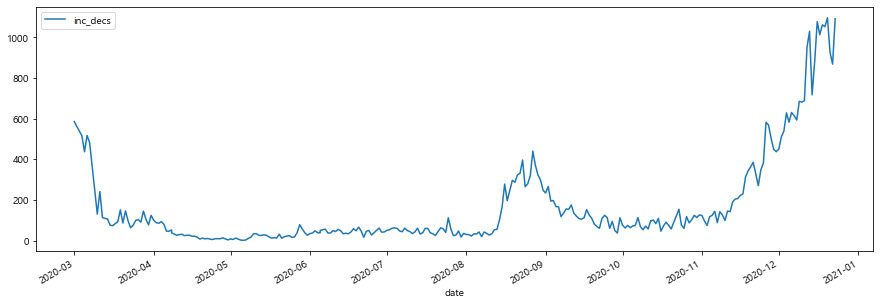

In [5]:
rows, cols = dm.get_national_status()
df = pd.DataFrame.from_records(data=rows, columns=cols)
df.date = pd.to_datetime(df.date)
fig = df.plot(x='date', y='inc_decs', figsize=(15, 5))

In [4]:
type(fig)

matplotlib.axes._subplots.AxesSubplot

In [3]:
rows, cols = dm.get_capital_area()
df = pd.DataFrame.from_records(data=rows, columns=cols)
df

,date,inc_decs
0,2020-12-21,244
1,2020-12-21,88
2,2020-12-21,328
3,2020-12-20,249
4,2020-12-20,62
...,...,...
916,2020-12-24,53
917,2020-12-24,319
918,2020-12-24,285
919,2020-12-24,53


In [4]:
conn = sqlite3.connect('./DB/covid_1.db')
cur = conn.cursor()
sql = "select date, inc_decs from covid_status where region in ('서울', '경기', '인천');"
cur.execute(sql)
rows = cur.fetchall()
print(cur.description)
cols = [column[0] for column in cur.description]
cur.close()
conn.close()

(('date', None, None, None, None, None, None), ('inc_decs', None, None, None, None, None, None))


In [5]:
rows

[('2020-12-21', 244),
 ('2020-12-21', 88),
 ('2020-12-21', 328),
 ('2020-12-20', 249),
 ('2020-12-20', 62),
 ('2020-12-20', 473),
 ('2020-12-19', 278),
 ('2020-12-19', 46),
 ('2020-12-19', 384),
 ('2020-12-19', 278),
 ('2020-12-19', 46),
 ('2020-12-19', 384),
 ('2020-12-18', 301),
 ('2020-12-18', 65),
 ('2020-12-18', 398),
 ('2020-12-17', 291),
 ('2020-12-17', 80),
 ('2020-12-17', 423),
 ('2020-12-17', 291),
 ('2020-12-17', 80),
 ('2020-12-17', 423),
 ('2020-12-16', 329),
 ('2020-12-16', 67),
 ('2020-12-16', 378),
 ('2020-12-15', 288),
 ('2020-12-15', 55),
 ('2020-12-15', 251),
 ('2020-12-14', 226),
 ('2020-12-14', 36),
 ('2020-12-14', 219),
 ('2020-12-13', 331),
 ('2020-12-13', 62),
 ('2020-12-13', 399),
 ('2020-12-12', 272),
 ('2020-12-12', 42),
 ('2020-12-12', 362),
 ('2020-12-11', 229),
 ('2020-12-11', 37),
 ('2020-12-11', 252),
 ('2020-12-10', 215),
 ('2020-12-10', 37),
 ('2020-12-10', 251),
 ('2020-12-09', 218),
 ('2020-12-09', 48),
 ('2020-12-09', 270),
 ('2020-12-08', 157),
 ('

In [7]:
len(rows)

921

In [18]:
s, g, inc, index = [], [], [], []
for i in range(int(len(rows)/3)):
    s.append(rows[3 * i + 2][1])
    g.append(rows[3 * i][1])
    inc.append(rows[3 * i + 1][1])
    index.append(rows[3 * i][0])
df1 = pd.DataFrame({
    '서울': s,
    '경기': g,
    '인천': inc,
    'date': [datetime.strptime(date, '%Y-%m-%d') for date in index]
})
df1 = df1.drop_duplicates().set_index('date')
df1

,서울,경기,인천
date,,,
2020-12-21,328,244,88
2020-12-20,473,249,62
2020-12-19,384,278,46
2020-12-18,398,301,65
2020-12-17,423,291,80
...,...,...,...
2020-03-04,1,7,2
2020-03-01,10,7,0
2020-12-22,317,206,45


In [19]:
conn = sqlite3.connect('./DB/covid_1.db')
cur = conn.cursor()
sql = "select date, inc_decs from covid_status where region in ('세종', '대전', '대구', '광주', '울산', '부산', '제주');"
cur.execute(sql)
rows = cur.fetchall()
cur.close()
conn.close()

In [20]:
rows

020-12-21', 20),
 ('2020-12-20', 24),
 ('2020-12-20', 1),
 ('2020-12-20', 6),
 ('2020-12-20', 3),
 ('2020-12-20', 14),
 ('2020-12-20', 25),
 ('2020-12-20', 33),
 ('2020-12-19', 24),
 ('2020-12-19', 0),
 ('2020-12-19', 9),
 ('2020-12-19', 5),
 ('2020-12-19', 9),
 ('2020-12-19', 20),
 ('2020-12-19', 39),
 ('2020-12-19', 24),
 ('2020-12-19', 0),
 ('2020-12-19', 9),
 ('2020-12-19', 5),
 ('2020-12-19', 9),
 ('2020-12-19', 20),
 ('2020-12-19', 39),
 ('2020-12-18', 27),
 ('2020-12-18', 0),
 ('2020-12-18', 31),
 ('2020-12-18', 5),
 ('2020-12-18', 4),
 ('2020-12-18', 20),
 ('2020-12-18', 39),
 ('2020-12-17', 12),
 ('2020-12-17', 0),
 ('2020-12-17', 10),
 ('2020-12-17', 11),
 ('2020-12-17', 10),
 ('2020-12-17', 21),
 ('2020-12-17', 44),
 ('2020-12-17', 12),
 ('2020-12-17', 0),
 ('2020-12-17', 10),
 ('2020-12-17', 11),
 ('2020-12-17', 10),
 ('2020-12-17', 21),
 ('2020-12-17', 44),
 ('2020-12-16', 15),
 ('2020-12-16', 0),
 ('2020-12-16', 6),
 ('2020-12-16', 15),
 ('2020-12-16', 2),
 ('2020-12-16',

In [21]:
sql = '''create table seoul (
    date text not null,
    id_nm int default 0,
    dist text not null,
    history text not null,
    move text not null,
    status text not null
);'''
dm.create_table(sql)